In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df = pd.read_csv("water_potability.csv")

In [7]:
#menampilkan seluruh isi yang ada pada datasets water_potability
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**A. EDA dan Visualisasi Data**

In [8]:
#Menampilkan seluruh informasi yang ada pada datasets water_potability
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Melihat apakah ada data yang kosong
df.isnull() .sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
# Melihat apakah ada data yang duplikat/lebih dari 1
df.duplicated() .sum()

np.int64(0)

In [11]:
# Menampilkan cout, mean, min, dan max
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


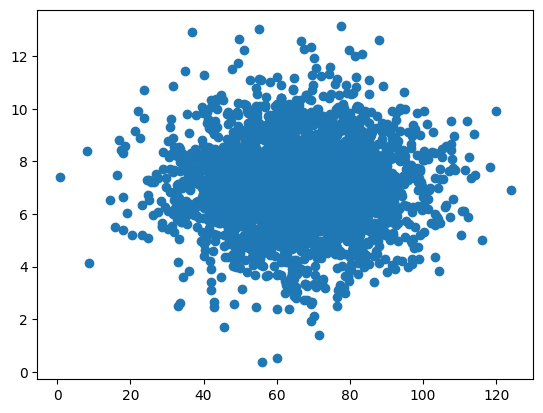

In [12]:
# Menampilkan scatter plot visualisasi
plt.scatter(df['Trihalomethanes'], df['Chloramines'])
plt.xlabel = 'Sulfate'
plt.ylabel = 'Turbidity'
plt.show()

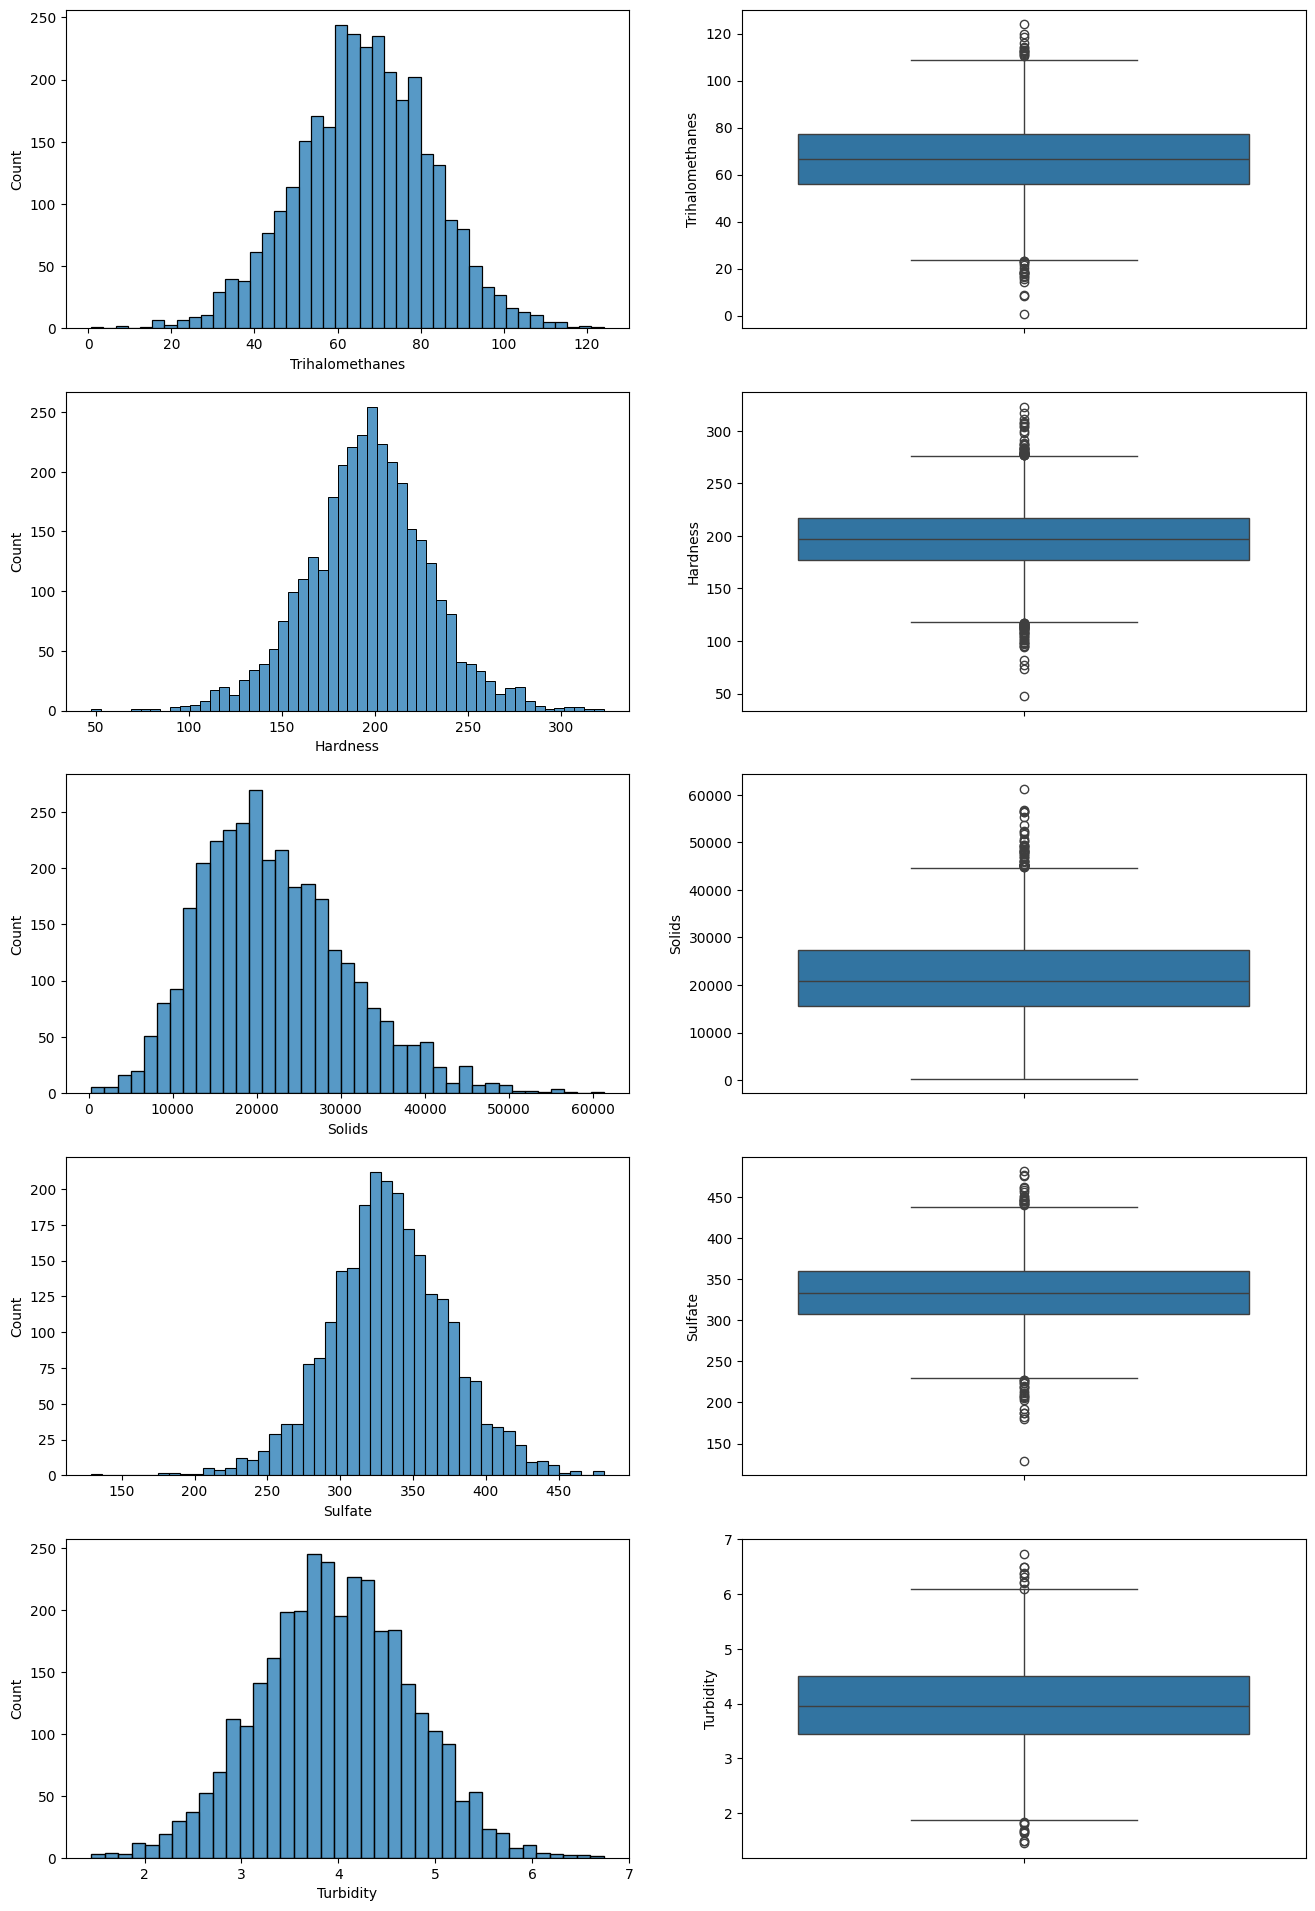

In [13]:
#melihat apakah terdapat outlier atau tidak
plt.figure(figsize=(16,24))
plt.subplot(5,2,1)
sns.histplot(df['Trihalomethanes'])
plt.subplot(5,2,2)
sns.boxplot(df['Trihalomethanes'])
plt.subplot(5,2,3)
sns.histplot(df['Hardness'])
plt.subplot(5,2,4)
sns.boxplot(df['Hardness'])
plt.subplot(5,2,5)
sns.histplot(df['Solids'])
plt.subplot(5,2,6)
sns.boxplot(df['Solids'])
plt.subplot(5,2,7)
sns.histplot(df['Sulfate'])
plt.subplot(5,2,8)
sns.boxplot(df['Sulfate'])
plt.subplot(5,2,9)
sns.histplot(df['Turbidity'])
plt.subplot(5,2,10)
sns.boxplot(df['Turbidity'])
plt.show()

**B. Analisis Korelasi**

In [14]:
# Menampilkan isi Korelasi
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

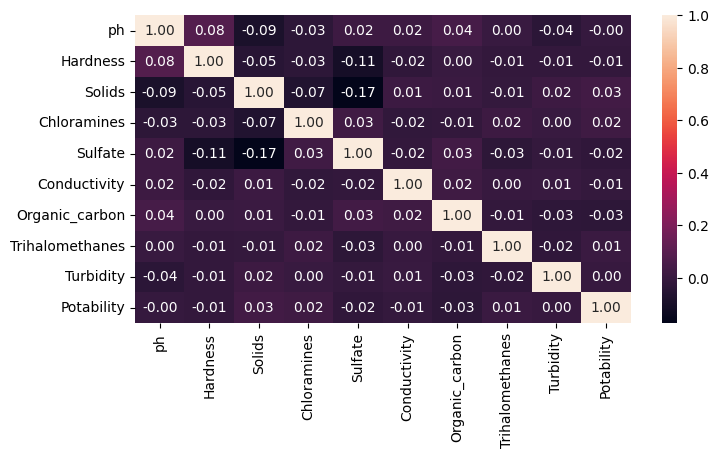

In [15]:
# melihat korelasi antar target
plt.figure(figsize=(8,4))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

In [16]:
# 2 VARIABLE
bebas = ['Solids', 'Organic_carbon']

x = df[bebas]
y = df['Potability']

**C. Membuat model Regresi Linear**

In [17]:
#memasukkan data dependent ke independent ke dalam variabel X dan Y
x = df.drop(columns=['Solids','Chloramines', 'Sulfate', 'Organic_carbon'], axis=1)
y = df['Potability']

In [18]:
print(x)

            ph    Hardness  Conductivity  Trihalomethanes  Turbidity  \
0          NaN  204.890455    564.308654        86.990970   2.963135   
1     3.716080  129.422921    592.885359        56.329076   4.500656   
2     8.099124  224.236259    418.606213        66.420093   3.055934   
3     8.316766  214.373394    363.266516       100.341674   4.628771   
4     9.092223  181.101509    398.410813        31.997993   4.075075   
...        ...         ...           ...              ...        ...   
3271  4.668102  193.681735    526.424171        66.687695   4.435821   
3272  7.808856  193.553212    392.449580              NaN   2.798243   
3273  9.419510  175.762646    432.044783        69.845400   3.298875   
3274  5.126763  230.603758    402.883113        77.488213   4.708658   
3275  7.874671  195.102299    327.459760        78.698446   2.309149   

      Potability  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
32

In [20]:
# Membuat variabel train dan test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=100)

In [21]:
print (x_train.shape)
print (x_test.shape)

(2457, 6)
(819, 6)


In [22]:
#mengisi nilai NaN dengan nilai rata rata kolom pada x_train
x_train = x_train.fillna(x_train.mean())
# mengisi nilai NaN dengan nilai rata rata pada y_train
y_train = y_train.fillna(y_train.mean())

In [23]:
# Memasukan algoritma yang akan digunakan
# Model = XGBRegressor() => algoritma untuk prediksi lebih maksimal
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [24]:
# Coefficient dan Intercept
print('intercept: ', regr.intercept_)
print('coef: ',regr.coef_)

intercept:  5.551115123125783e-16
coef:  [-4.22934946e-19 -7.58941521e-19  2.22830833e-19 -3.72500109e-18
 -2.99349726e-17  1.00000000e+00]


In [25]:
# Menghapus dan membersihkan
x_test_cleaned = x_test.dropna()
y_test_cleaned = y_test.dropna()

In [26]:
pred = regr.predict(x_test_cleaned)

In [27]:
# mengevaluasi performa model atau membandingkan ukuran set data uji dan dataset prediksi
num_samples_y_test = len(y_test_cleaned)
num_samples_pred = len(pred)

# menampilkan jumlah sampel dalam y_test dalam pred
print("Jumlah sampel dalam y_test_cleaned:", num_samples_y_test)
print("Jumlah sampel dalam pred:", num_samples_pred)

Jumlah sampel dalam y_test_cleaned: 819
Jumlah sampel dalam pred: 663


In [28]:
# Menyamakan jumlah sampel
num_samples = min(len(y_test_cleaned), len(pred))
y_test_cleaned = y_test_cleaned[:num_samples]
pred = pred[:num_samples]

**D. Evaluasi Model Linear**

90:10

In [29]:
#split data menjadi training dan test perbandingan menjadi 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

In [30]:
# menampilkan dan meng evaluasi model dengan MAE, MSE, RMSE dan R-squared
mae = mean_absolute_error(y_test_cleaned, pred)
print("MAE:", mae)

mse = mean_squared_error(y_test_cleaned, pred)
print("MSE:", mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test_cleaned, pred))
print("RMSE:", rmse)

print("R-squared:", ((r2_score(y_test_cleaned, pred))*100), "%")


MAE: 0.4962292609351433
MSE: 0.49622926093514313
RMSE: 0.7044354199890457
R-squared: -108.46267059138337 %


In [33]:
# menampilkan dan meng evaluasi model dengan MAE, MSE, RMSE dan R-squared
# Pastikan num_samples tidak melebihi panjang array yang tersedia
num_samples = min(len(y_test_cleaned), len(pred))

# Potong kedua array sehingga memiliki jumlah sampel yang sama
y_test_cleaned = y_test_cleaned[:num_samples]
pred = pred[:num_samples]

print('Mean Absolute Error (MAE): %.2f' % mean_absolute_error(pred, y_test_cleaned))
print('Mean Squared Error (MSE): %.2f' % mean_squared_error(pred, y_test_cleaned))
print('Root Mean Squared Error (RMSE): %.2f' % np.sqrt(mean_squared_error(pred, y_test_cleaned)))
print("R-squared:", ((r2_score(y_test_cleaned, pred)) * 100), "%")


Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.50
Root Mean Squared Error (RMSE): 0.70
R-squared: -108.46267059138337 %


In [34]:
# Menghitung RMSE(mengevaluasi akurasi prediksi model dengan membandingkan nilai prediksi dengan nilai sebenarnya)
rmse = np.sqrt(metrics.mean_squared_error(y_test_cleaned, pred))
print("RMSE:", rmse)

RMSE: 0.7044354199890457


In [35]:
# Menghitung R-squared dalam bentuk persentase
r_squared_percentage = r2_score(y_test_cleaned, pred) * 100

# Menentukan batas threshold untuk kategorisasi
threshold = 50  # Misalnya, kita akan menganggap kualitas air "baik" jika R-squared lebih dari 50%

# Membuat keputusan berdasarkan R-squared
if r_squared_percentage > threshold:
    print("Kualitas air dikategorikan sebagai baik.")
else:
    print("Kualitas air tidak memenuhi standar untuk dikategorikan sebagai baik.")

Kualitas air tidak memenuhi standar untuk dikategorikan sebagai baik.


In [36]:
# Tentukan nilai threshold untuk kategorisasi
threshold_rmse = 0.5  # Misalnya, kita akan menganggap RMSE kurang dari 0.5 sebagai kualitas air yang baik

# Evaluasi RMSE
if rmse < threshold_rmse:
    print("Kualitas air dikategorikan sebagai baik.")
else:
    print("Kualitas air tidak memenuhi standar untuk dikategorikan sebagai baik.")


Kualitas air tidak memenuhi standar untuk dikategorikan sebagai baik.


In [38]:
input_data = (104, 727, 348, 379, 484, 1211)

input_data_array = np.array(input_data)

input_data_reshape = input_data_array.reshape(1, -1)

prediction = regr.predict(input_data_reshape)
print(prediction)

[1211.]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle

In [40]:
filename = "water_potability.sav"
pickle.dump(regr, open(filename, 'wb'))

In [42]:

from sklearn.preprocessing import StandardScaler
import pickle

# Misalkan X_train adalah data pelatihan fitur
scaler = StandardScaler()
scaler.fit(x_train)

# Simpan scaler ke dalam file
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)
